In [1]:
import math
import numpy as np
import pandas as pd

from scipy.stats import lognorm
import scipy.stats as stats

import seaborn as sns
from matplotlib import pylab
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/result.csv')

## Check target (Test for Normality )

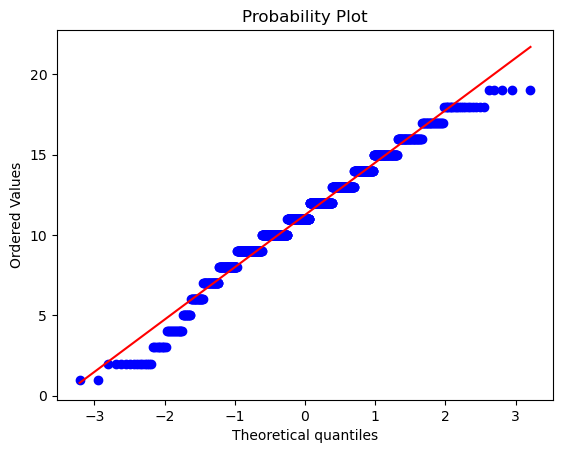

In [3]:
stats.probplot(df.Final_G, dist="norm", plot=pylab)
pylab.show()

In [4]:
# it looks more-or-less normal

## Point-biserial correlation

In [5]:
bin_features = df.columns[df.nunique() == 2]
# Label encoding for categoricals
for colname in bin_features:
    df[colname], _ = df[colname].factorize()

# All discrete features should now have integer dtypes
discrete_features = df.dtypes == int

In [6]:
# One of the assumptions of Point-Biserial correlation is that there is similar spread between the two groups of the binary variable.
# I test this using Levene's test of equality of variances

def levene_test_bi(df, feature_list, target):
    features_eq_var = []
    for feat in feature_list:
        print(feat)
        unique_list = df[feat].unique()
        levene_val = stats.levene(df[df[feat] == unique_list[0]][target], 
                                   df[df[feat] == unique_list[1]][target], 
                                   center='mean'
                                  )
        if levene_val.pvalue > .05:
            features_eq_var.append(feat)
        print(levene_val)
    return features_eq_var
    

In [17]:
bin_features_eq_var

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'internet',
 'romantic']

In [7]:
bin_features_eq_var = levene_test_bi(df, bin_features, 'Final_G')
print('Number of features:', len(bin_features_eq_var))

school
LeveneResult(statistic=0.12630589905915213, pvalue=0.7223653129682932)
sex
LeveneResult(statistic=0.15284960444083742, pvalue=0.6959068356740932)
address
LeveneResult(statistic=0.0011083814389660006, pvalue=0.9734478197243)
famsize
LeveneResult(statistic=2.3111792383314973, pvalue=0.12874993710922192)
Pstatus
LeveneResult(statistic=0.04090035909701647, pvalue=0.8397698538909533)
schoolsup
LeveneResult(statistic=16.581877144150845, pvalue=5.0123312492356774e-05)
famsup
LeveneResult(statistic=0.6841414275997583, pvalue=0.40835364725196943)
paid
LeveneResult(statistic=1.2460099156670341, pvalue=0.26457327193380487)
activities
LeveneResult(statistic=0.013748064983082472, pvalue=0.9066828435591937)
nursery
LeveneResult(statistic=3.0717124069598216, pvalue=0.07995960168812606)
higher
LeveneResult(statistic=6.925834974643431, pvalue=0.00862145619626345)
internet
LeveneResult(statistic=0.15583834424984166, pvalue=0.6930981072928768)
romantic
LeveneResult(statistic=0.34885987058854406, p

In [8]:
def point_biserial_corr(df, feature_list, target):
    corr_point_bi = {}
    for feat in feature_list:
        print(feat)
        point_bi = stats.pointbiserialr(df[feat], df[target])
        print(point_bi)
        corr_point_bi[feat] = point_bi.correlation
    return pd.Series(corr_point_bi).sort_values()

In [9]:
point_biserial_corr = point_biserial_corr(df, bin_features_eq_var, 'Final_G')

school
PointbiserialrResult(correlation=-0.14532920593679505, pvalue=2.4152228329779033e-06)
sex
PointbiserialrResult(correlation=-0.02539607454691607, pvalue=0.412374912690816)
address
PointbiserialrResult(correlation=-0.12174346745093785, pvalue=8.02618760071555e-05)
famsize
PointbiserialrResult(correlation=0.06792291351579245, pvalue=0.02819502238528381)
Pstatus
PointbiserialrResult(correlation=-0.01871105975511521, pvalue=0.5459091682999622)
famsup
PointbiserialrResult(correlation=0.0010631939410721317, pvalue=0.9726285924772893)
paid
PointbiserialrResult(correlation=-0.04110095684864311, pvalue=0.18451451680531314)
activities
PointbiserialrResult(correlation=0.05021891893228049, pvalue=0.10486709401407092)
nursery
PointbiserialrResult(correlation=-0.05008172318811773, pvalue=0.10582079626352311)
internet
PointbiserialrResult(correlation=0.11486341138658661, pvalue=0.00019983870610560103)
romantic
PointbiserialrResult(correlation=-0.09176590471597157, pvalue=0.0029997959080151205)


In [10]:
point_biserial_corr

school       -0.145329
address      -0.121743
romantic     -0.091766
nursery      -0.050082
paid         -0.041101
sex          -0.025396
Pstatus      -0.018711
famsup        0.001063
activities    0.050219
famsize       0.067923
internet      0.114863
dtype: float64

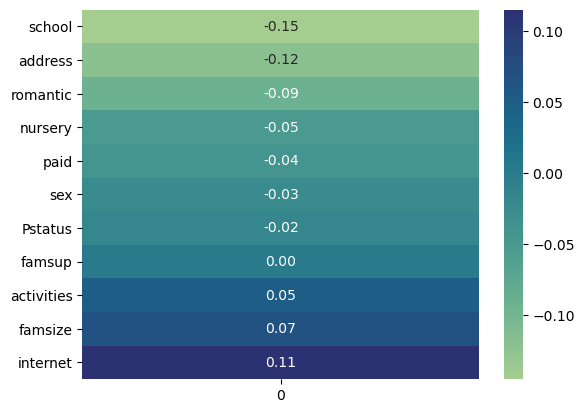

In [11]:
sns.heatmap(pd.DataFrame(point_biserial_corr), annot=True, fmt=".2f", cmap="crest")
plt.show()

## ANOVA

In [12]:
anova_feat = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']
# For ANOVA the data should be distributed with equal variance.

In [13]:
for feat in anova_feat:
    print(feat)
    print(df.groupby(feat)['Final_G'].var())
    print('\n')

Medu
Medu
0     5.777778
1     9.314024
2     9.053201
3    11.732653
4    10.647080
Name: Final_G, dtype: float64


Fedu
Fedu
0     6.361111
1    10.495695
2    11.062225
3     8.942217
4    10.876041
Name: Final_G, dtype: float64


Mjob
Mjob
at_home     10.111346
health       9.067901
other       10.124810
services    11.056503
teacher     11.457603
Name: Final_G, dtype: float64


Fjob
Fjob
at_home     11.601534
health       9.000000
other       10.393841
services    10.177976
teacher     14.578365
Name: Final_G, dtype: float64


guardian
guardian
father     9.592321
mother    11.191180
other      9.296423
Name: Final_G, dtype: float64




In [14]:
stats.f_oneway(df['Final_G'][df['Mjob'] == 'at_home'],
               df['Final_G'][df['Mjob'] == 'health'],
               df['Final_G'][df['Mjob'] == 'other'],
               df['Final_G'][df['Mjob'] == 'services'],
               df['Final_G'][df['Mjob'] == 'teacher'])

F_onewayResult(statistic=9.972441004595417, pvalue=6.392921956303362e-08)

There is a statistically significant difference between the groups (the mother job effects the grade)

In [15]:
stats.f_oneway(df['Final_G'][df['Fjob'] == 'at_home'],
               df['Final_G'][df['Fjob'] == 'health'],
               df['Final_G'][df['Fjob'] == 'other'],
               df['Final_G'][df['Fjob'] == 'services'],
               df['Final_G'][df['Fjob'] == 'teacher'])

F_onewayResult(statistic=5.1524477617710005, pvalue=0.0004110994325748312)

There is a statistically significant difference between the groups (the father job effects the grade)

In [16]:
stats.f_oneway(df['Final_G'][df['guardian'] == 'father'],
               df['Final_G'][df['guardian'] == 'mother'],
               df['Final_G'][df['guardian'] == 'other'])

F_onewayResult(statistic=5.336346744302782, pvalue=0.004945994374257675)

There is a statistically significant difference between the groups (the guardian effects the grade)